<a href="https://colab.research.google.com/github/luis314159/portfolio/blob/master/Reco%26Filtrado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<center>Universidad Autónoma de Chihuahua**

<div align= "center">
<img src="https://uach.mx/assets/media/snippet/62/escudo-web-header-black.svg" width="350" height="350" />

</div>
<div align ="center">
<img src="https://cimav.edu.mx/wp-content/uploads/2017/05/ingenieria-uach.png" width="200" height="200" />
</div>

##<center>Maestría en Ingeniería en Computación 
##<center>Reconstrucción y Filtrado de componente de 50Hz 
###<center>Catedrático: Dr. Alain Manzo Martínez 
###<center>Estudiante:Ing. Luis Ángel Almazán López</center>
<!-- badges: start -->
[![@luis3.14159](https://img.shields.io/badge/@luis314159-gitHub-darkred?&logoColor=white)](https://github.com/luis314159/) 
[![Platzi](https://img.shields.io/badge/Platzi_count-luisangelalmaznlpez-green&logoColor=white)](https://platzi.com/p/luisangelalmaznlpez/)
![Email](https://img.shields.io/badge/email-p364977@uach.mx-darkblue?&logoColor=white)
<!-- badges: end -->

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
12345678910111213141516171819202122232425262728293031323334353637383940414243444546474849

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:163: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:166: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:173: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warni

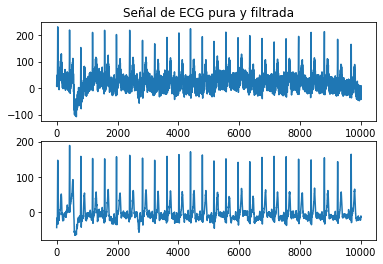

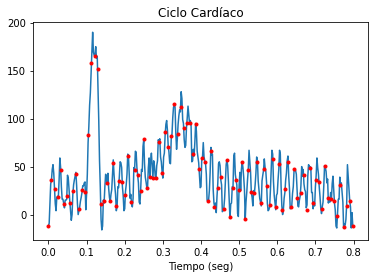

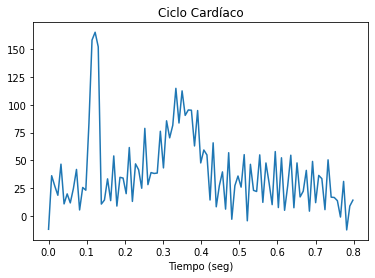

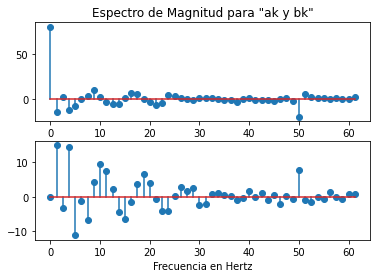

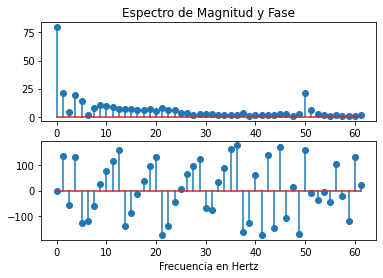

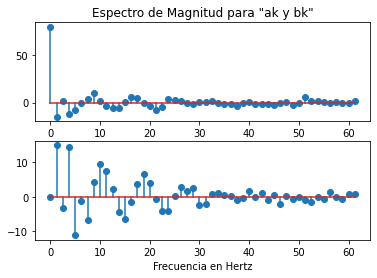

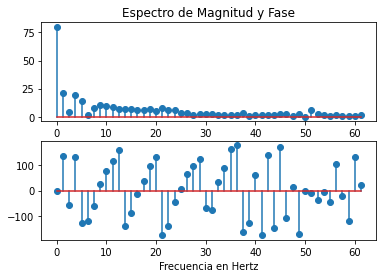

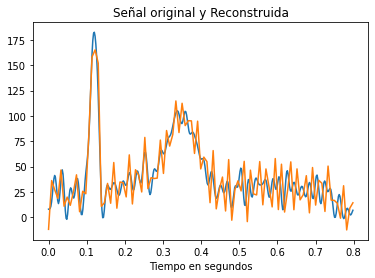

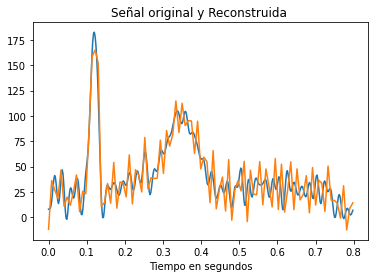

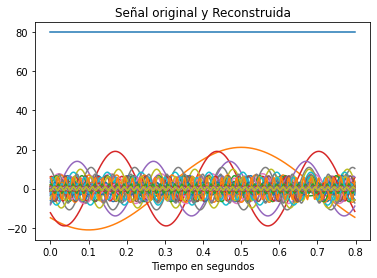

In [ ]:
# =============================================================================
#                           FILTRO PASA ALTAS                                                                        
# =============================================================================
from google.colab import drive
drive.mount('/content/drive')


import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
#import sys

# =============================================================================
#                   Abre señal de ECG (Base de datos Physionet)
# =============================================================================


file = open('/content/drive/MyDrive/procesamiento/Unidad2/DataSetPhysionet/ecg.txt',"r")
#Reemplaza el \n por un espacio ' '
openedFile = file.read().replace('\n',' ')
#Divide los datos y genera una lista con datos del tipo string
data_str = openedFile.split(' ')
#Convierte los datos del tipo string a un tipo entero
data_num = list(map(int,data_str))
#Cantidad de datos en el archivo
array_length = len(data_num)
#Declaramos dos arreglos con ceros del tamaño de array_length
filtered_signal = np.zeros(int(array_length/2))
raw_signal = np.zeros(int(array_length/2))
#Ciclo para separar señales
i = 0
j = 0
while(j < array_length):
    raw_signal[i] = data_num[j]
    filtered_signal[i] = data_num[j+1]
    j += 2
    i += 1
#Gráficos
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(raw_signal)
plt.title('Señal de ECG pura y filtrada')
plt.subplot(2,1,2)
plt.plot(filtered_signal)
# =============================================================================
#                  EXTRAE UN CICLO CARDÍACO
# =============================================================================

#Extrae ciclo cardíaco de la señal filtrada
signal = raw_signal[5900:6300]
#Número de muestras en el ciclo cardíaco
M = len(signal)
#Condición de periodicidad
signal[M-1] = signal[0]
#Frecuencia de muestreo en Hertz
fs = 500
#Periodo de muestreo
ts = 1/fs
#Vector de tiempos
l = np.arange(0,M)
t = l*ts 
#Gráfico
plt.figure(2)
plt.plot(t,signal)
plt.title('Ciclo Cardíaco')
plt.xlabel('Tiempo (seg)')


# =============================================================================
#                          Análisis en Frecuencia
# =============================================================================


#Especificar el número de muestras en la señal (siempre impar)
N = 100
#Vector de tiempos para la interpolación
te = np.linspace(0,t[-1],N)
#Aplica método de interpolación
inter = interpolate.splrep(t,signal)
ye = interpolate.splev(te,inter)
#Gráfica
plt.figure(2)
plt.plot(te,ye,'r.')
#Número de trapecios
Nt = N-1
#Factor multiplicativo de las sumatorias
fact = 2/Nt
#Incremento en radianes 
inc = 2*np.pi/Nt
#Vector de ángulos para cada una de las muestras
tn = np.linspace(0,2*np.pi-inc,Nt)
#Gráfico
plt.figure(3)
ti = np.linspace(0,t[-1],len(ye[0:N-1]))
plt.plot(ti,ye[0:N-1])
#plt.plot(tn*360/(2*np.pi),ye[0:N-1])
plt.title('Ciclo Cardíaco')
plt.xlabel('Tiempo (seg)')
#Cálcula el coeficiente a0
a0 = fact*np.sum(ye[0:Nt])
#Número de componentes de frecuencia
K = int(Nt/2+1)
#Periodo de la señal
T = M*ts
#Frecuencia fundamental
fo = 1/T
#Inicializa arreglos para ak,bk,ck,phik y fk
ak = np.zeros(K)
bk = np.zeros(K)
ck = np.zeros(K)
phik = np.zeros(K)
fk = np.zeros(K)
#Asignar el valor de a0 en ak y ck
ak[0] = a0
ck[0] = np.abs(a0)

        
#Calcula los coeficientes de la serie de Fourier

for k in range(1,K):
    
    
    print(k,end ="")


    #Coeficientes Rectangulares
    ak[k] = fact*np.sum(ye[0:Nt]*np.cos(k*tn))
    bk[k] = fact*np.sum(ye[0:Nt]*np.sin(k*tn))

    #Coeficientes Polares
    ck[k] = np.sqrt(ak[k]**2 + bk[k]**2)

    #Primer cuadrante
    if (ak[k] >= 0 and bk[k] >= 0):
        phik[k] = np.arctan(bk[k]/ak[k])
        #print("cuadrante 1")
    #Segundo cuadrante
    if (ak[k] <= 0 and bk[k] >= 0):
        phik[k] = np.pi - np.arctan(np.abs(bk[k])/np.abs(ak[k]))
        #print("cuadrante 2")
    #Tercer cuadrante
    if (ak[k] <=0 and bk[k] < 0):
        phik[k] = -np.pi +np.arctan(np.abs(bk[k])/np.abs(ak[k]))

        #print("cuadrante 3")
    #Cuarto cuadrante
    if (ak[k] >= 0 and bk[k] <= 0):
        phik[k] = np.arctan(bk[k]/ak[k])
        #print("cuadrante 4")
    
    #Múltiplos de la frecuencia fundamental
    fk[k] = k*fo
    
    #ángulo en grados
    phik[k] = phik[k]*180/np.pi 
    
    
    

#Gráfico
plt.figure(4)
plt.subplot(2,1,1)
plt.stem(fk,ak)
plt.title('Espectro de Magnitud para "ak y bk"')
plt.subplot(2,1,2)
plt.stem(fk,bk)
plt.xlabel('Frecuencia en Hertz')    
    


plt.figure(5)
plt.subplot(2,1,1)
plt.stem(fk,ck)
plt.title('Espectro de Magnitud y Fase')
plt.subplot(2,1,2)
plt.stem(fk,phik)
plt.xlabel('Frecuencia en Hertz')


#Quitar componente de 50 Hz
freq= np.where(fk==50)
#para ak y bk 
ak[freq]=0
bk[freq]=0
#ak[freq]=(ak[39]+ak[41])/2
#bk[40]=(bk[39]+bk[41])/2

#para ck uy Theta
#ck[40]=(ck[39]+ck[41])/2
#phik[40]=(phik[39]+phik[41])/2

ck[freq]=0
phik[freq]=0

#Gráfico
plt.figure(6)
plt.subplot(2,1,1)
plt.stem(fk,ak)
plt.title('Espectro de Magnitud para "ak y bk"')
plt.subplot(2,1,2)
plt.stem(fk,bk)
plt.xlabel('Frecuencia en Hertz')    
    


plt.figure(7)
plt.subplot(2,1,1)
plt.stem(fk,ck)
plt.title('Espectro de Magnitud y Fase')
plt.subplot(2,1,2)
plt.stem(fk,phik)
plt.xlabel('Frecuencia en Hertz')




# =============================================================================
#                       Reconstrucción de la señal
# =============================================================================

#x(t) = ao/2 + Σ  ak*cos(kt) + bk*sen(kt

#Vector para la señal reconstruída


L=len(t)
xr= np.zeros(L)

#Evaluamos la serie de Fourier Rectangular
for k in range(1,K):
    xr= xr + ak[k]*np.cos(2*np.pi*k*fo*t) + bk[k]*np.sin(2*np.pi*k*fo*t)

#Agregar offset
xr=xr+a0/2

#GRÁFICO


plt.figure(8)
plt.plot(t,xr)  
plt.plot(ti,ye[0:N-1])    
plt.title("Señal original y Reconstruida de rectangular")
plt.xlabel("Tiempo en segundos")

#Vector para la señal reconstruída 2

xp= np.zeros(L)
#Matriz de sonoides

senoides = np.zeros((K+2,M))


#Evaluamos la serie de Fourier Polar
for k in range(1,K):
    xp= xp +ck[k]*np.cos(2*np.pi*k*fo*t-phik[k]*np.pi/180)
    
    
    senoides[k,:]=ck[k]*np.cos(2*np.pi*k*fo*t+(phik[k]*np.pi/180))
#Agregar offset
xp=xp+a0/2

#Poner offset en senoides

senoides[0,:] = a0 

#GRÁFICO

plt.figure(9)
plt.plot(t,xp)

plt.plot(ti,ye[0:N-1])
plt.title("Señal original y Reconstruida de polar ")
plt.xlabel("Tiempo en segundos")

plt.figure(10)
for k in range(0,k):
    plt.plot(t,senoides[k,:])    
    plt.title("Senoides")
    plt.xlabel("Tiempo en segundos")



